## 1. Data Preprocessing

In [39]:
import pandas as pd
import pickle
import numpy as np
import re
from nltk.corpus import stopwords
import string

In [40]:
with open("covid.txt", "rb") as handle : # read text file into dataframe
    covid_df = pickle.loads(handle.read())
with open("christmas.txt", "rb") as handle : # read text file into dataframe
    christmas_df = pickle.loads(handle.read())
with open("spacex.txt", "rb") as handle : # read text file into dataframe
    spacex_df = pickle.loads(handle.read())

In [41]:
spacex_df = spacex_df.sample(n = 500) 
christmas_df = christmas_df.sample(n = 500) 
covid_df = covid_df.sample(n = 500) 

In [42]:
data = pd.concat([covid_df, christmas_df, spacex_df], ignore_index = True)

In [43]:
from sklearn.model_selection import train_test_split
import random

train, test = train_test_split(data, test_size = 0.2)
# train.to_pickle("train.pkl")
# test.to_pickle("test.pkl")

#train = pd.read_pickle("train.pkl")
#test = pd.read_pickle("test.pkl")

print("Number of labels in train: ", end = "")
print(train.shape[0])
print("Number of labels in test: ", end = "")
print(test.shape[0])

Number of labels in train: 1200
Number of labels in test: 300


In [44]:
# remove stop words from tweet
stop_set = stopwords.words('english') + list(string.punctuation)
train['Text'] = train['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_set)]))
test['Text'] = test['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_set)]))

<ipython-input-44-b34948e8a87f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Text'] = train['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_set)]))
<ipython-input-44-b34948e8a87f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Text'] = test['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_set)]))


In [45]:
train.head(10)

,Classification,Text,Hashtag
919,christmas,new tradition wizard wizardry christian darkac...,"[wizard, wizardry, christmascountdown2020, chr..."
1231,spacex,hail mary hop kevin hayes russ herewego steele...,"[herewego, steelersvsbengals, steelers, bengal..."
571,christmas,competition time wants win bottle mince pie gi...,"[competition, mincepie, gin, liqueur]"
840,christmas,looking ideas fun wood slice ornaments painted...,"[ad, diy, tuesdaythoughts, tuesdayvibes, ideas]"
878,christmas,legendary aretha franklin queen soul hand sign...,"[giftideas, memorabilia, christmas2020]"
1488,spacex,i'm saying prayer right,[]
719,christmas,dove men care trio gifts set gift men teenager...,[]
779,christmas,days new design bamboo breadboard available py...,"[pyrography, christmasiscoming, christmasgifts]"
393,covid,act urged safe summer ahead restrictions easin...,"[coronavirus, covid19, coronainfoch, corona, c..."
738,christmas,also corktoday chat man eats chilis porridge e...,"[corktoday, covid, northcork, fermoy]"


In [46]:
test.head(10)

,Classification,Text,Hashtag
1218,spacex,decided watch premiere new show theastronauts ...,"[theastronauts, spacecases, spacecampalumni]"
58,covid,flu season way infections rise among older vul...,[]
614,christmas,there's mystery gift scoobydoo scooby pals plu...,"[scoobydoo, scooby, ftctoys]"
1322,spacex,godspeed nasa resilience,"[nasa, resilience]"
353,covid,unravelled disparities amp inequalities faced ...,"[inequalities, bme, edi, bame, nhs]"
37,covid,major effect also overworked staff increased s...,"[overworked, staff, stress, disengagement, emp..."
520,christmas,everyone seen new shop new merch listed regula...,"[merch, f1]"
11,covid,cancellation tco gdznfhginm tco bcgcgsllv foll...,[]
1364,spacex,launch seen st pete fl tco hprvwjnaz,[]
232,covid,grim milestone today dead even take thanksgivi...,"[wearadamnmask, wearadamnmask]"


## 2. Naive Bayes model using Python's scikit-learn package

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
#pip install seaborn
import seaborn as sns; sns.set() 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [48]:
model_byes = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_byes.fit(train["Text"], train["Classification"]) # fit the model
labels = model_byes.predict(test["Text"]) # predict the hashtag of the test data
train_labels = model_byes.predict(train["Text"])

Micro-average F1 scores: 0.89
Macro-average F1 scores: 0.890468


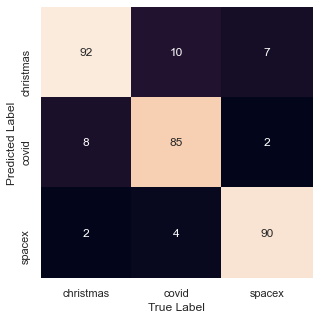

In [49]:
# confusion matrix for test set
distinct_label = sorted(set(test["Classification"])) # since confusion matrix label is automatically sorted, sort the distinct label in train_labels to prepare x, y label for heatmap
mat = confusion_matrix(test["Classification"], labels)
plt.figure(figsize = (5, 5))
ax = sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = distinct_label, yticklabels = distinct_label)
ax.set_ylim(len(distinct_label), 0) # since heatmap cut off numbers, we need to set up y limit 

plt.xlabel("True Label")
plt.ylabel("Predicted Label");

print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(test["Classification"], labels, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(test["Classification"], labels, average = "macro"), 6))

In [50]:
# Training set error
print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(train["Classification"], train_labels, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(train["Classification"], train_labels, average = "macro"), 6))

Micro-average F1 scores: 0.996667
Macro-average F1 scores: 0.996665


## 3-1. MLPClassifier to build neural network model with 2 hidden layer

In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [52]:
X_train, X_test, y_train, y_test = train['Text'], test['Text'], train['Classification'], test['Classification']

In [53]:
vectorizer = TfidfVectorizer()

In [54]:
# reload model without fit again
model3_1 = pickle.load(open('model3_1.sav', 'rb'))

Iteration 1, loss = 1.09467128
Validation score: 0.358333
Iteration 2, loss = 1.05077384
Validation score: 0.708333
Iteration 3, loss = 0.98397012
Validation score: 0.816667
Iteration 4, loss = 0.88020993
Validation score: 0.833333
Iteration 5, loss = 0.73961149
Validation score: 0.825000
Iteration 6, loss = 0.57763882
Validation score: 0.825000
Iteration 7, loss = 0.41184216
Validation score: 0.833333
Iteration 8, loss = 0.26363033
Validation score: 0.841667
Iteration 9, loss = 0.15372435
Validation score: 0.841667
Iteration 10, loss = 0.08550376
Validation score: 0.833333
Iteration 11, loss = 0.04823934
Validation score: 0.833333
Iteration 12, loss = 0.02874191
Validation score: 0.841667
Iteration 13, loss = 0.01876682
Validation score: 0.833333
Iteration 14, loss = 0.01328507
Validation score: 0.825000
Iteration 15, loss = 0.00989987
Validation score: 0.825000
Iteration 16, loss = 0.00787449
Validation score: 0.825000
Iteration 17, loss = 0.00644067
Validation score: 0.825000
Iterat

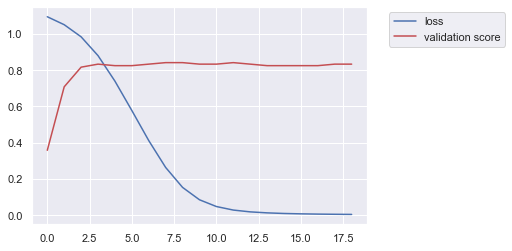

In [55]:
# comment out this two lines when loading model from pickle
model3_1 = MLPClassifier(early_stopping = True, verbose = True, hidden_layer_sizes = (100, 100))
model3_1.fit(vectorizer.fit_transform(X_train), y_train)

label3_1 = model3_1.predict(vectorizer.transform(X_test))
label3_1_train = model3_1.predict(vectorizer.transform(X_train))
test_acc = accuracy_score(y_test, label3_1)
loss_values = model3_1.loss_curve_
valid_values = model3_1.validation_scores_

print("accuracy score = " + str(test_acc))
plt.plot(loss_values,'-b', label = 'loss')
plt.plot(valid_values,'-r', label = 'validation score')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
plt.show()

Micro-average F1 scores: 0.88
Macro-average F1 scores: 0.880865


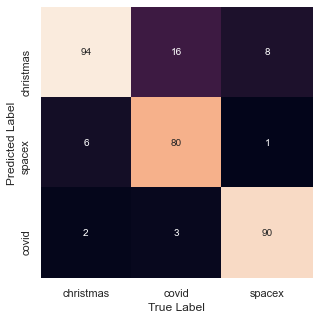

In [56]:
distinct_label = list(set(label3_1)) # since confusion matrix label is automatically sorted, sort the distinct label in train_labels to prepare x, y label for heatmap
mat = confusion_matrix(y_test, label3_1)
plt.figure(figsize = (5, 5))
ax = sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = sorted(set(test["Classification"])), yticklabels = distinct_label)
ax.set_ylim(len(distinct_label), 0) # since heatmap cut off numbers, we need to set up y limit 

plt.xlabel("True Label")
plt.ylabel("Predicted Label");

print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(y_test, label3_1, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(y_test, label3_1, average = "macro"), 6))

In [57]:
# Training set score
print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(y_train, label3_1_train, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(y_train, label3_1_train, average = "macro"), 6))

Micro-average F1 scores: 0.983333
Macro-average F1 scores: 0.983322


In [38]:
# save model into file so we don't need to fit everytime
filename = 'model3_1.sav'
pickle.dump(model3_1, open(filename, 'wb'))


## 3-2. 3-1 + higher alpha

In [11]:
# load model
model3_2 = pickle.load(open('model3_2.sav', 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'model3_2.sav'

Iteration 1, loss = 1.45706827
Validation score: 0.308333
Iteration 2, loss = 1.31428852
Validation score: 0.533333
Iteration 3, loss = 1.21897668
Validation score: 0.808333
Iteration 4, loss = 1.14201410
Validation score: 0.900000
Iteration 5, loss = 1.06734300
Validation score: 0.900000
Iteration 6, loss = 0.98252976
Validation score: 0.900000
Iteration 7, loss = 0.88458565
Validation score: 0.908333
Iteration 8, loss = 0.77442812
Validation score: 0.900000
Iteration 9, loss = 0.66383180
Validation score: 0.900000
Iteration 10, loss = 0.56352314
Validation score: 0.891667
Iteration 11, loss = 0.48169108
Validation score: 0.891667
Iteration 12, loss = 0.42110358
Validation score: 0.875000
Iteration 13, loss = 0.37753394
Validation score: 0.875000
Iteration 14, loss = 0.34618516
Validation score: 0.866667
Iteration 15, loss = 0.32301090
Validation score: 0.875000
Iteration 16, loss = 0.30528326
Validation score: 0.858333
Iteration 17, loss = 0.29141031
Validation score: 0.875000
Iterat

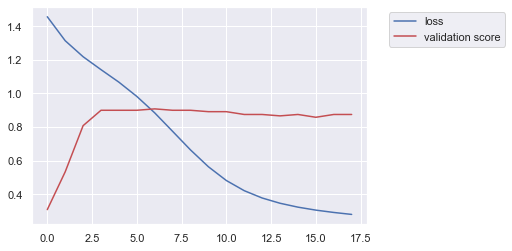

0.9883333333333333


In [58]:
# comment out this two lines when loading model from pickle
model3_2 = MLPClassifier(early_stopping = True, verbose = True, alpha = 0.5, hidden_layer_sizes = (100, 100))
model3_2.fit(vectorizer.fit_transform(X_train), y_train)

label3_2 = model3_2.predict(vectorizer.transform(X_test))
label3_2_train = model3_2.predict(vectorizer.transform(X_train))
test_acc = accuracy_score(y_test, label3_2)
loss_values = model3_2.loss_curve_
valid_values = model3_2.validation_scores_

print("accuracy score = " + str(test_acc))
plt.plot(loss_values,'-b', label='loss')
plt.plot(valid_values,'-r', label = 'validation score')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
plt.show()

train_lab = model3_2.predict(vectorizer.transform(X_train))
train_accuracy = accuracy_score(y_train, train_lab)
print(train_accuracy)

Micro-average F1 scores: 0.863333
Macro-average F1 scores: 0.863105


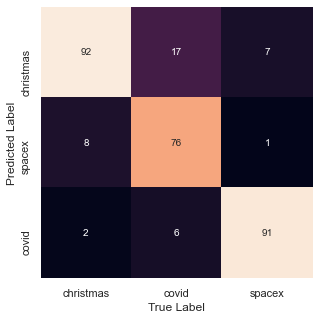

In [59]:
distinct_label = list(set(label3_2)) # since confusion matrix label is automatically sorted, sort the distinct label in train_labels to prepare x, y label for heatmap
mat = confusion_matrix(y_test, label3_2)
plt.figure(figsize = (5, 5))
ax = sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = sorted(set(test["Classification"])), yticklabels = distinct_label)
ax.set_ylim(len(distinct_label), 0) # since heatmap cut off numbers, we need to set up y limit 

plt.xlabel("True Label")
plt.ylabel("Predicted Label");

print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(y_test, label3_2, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(y_test, label3_2, average = "macro"), 6))

In [60]:
# Training set score
label3_3_train = model3_2.predict(vectorizer.transform(X_train))
print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(y_train, label3_2_train, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(y_train, label3_2_train, average = "macro"), 6))

Micro-average F1 scores: 0.988333
Macro-average F1 scores: 0.988311


In [16]:
filename = 'model3_2.sav'
pickle.dump(model3_2, open(filename, 'wb'))

## 4. Tensor Flow model with Bidirectional LSTM

In [69]:
#pip install gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models import FastText
import numpy as np
import re
import matplotlib.pyplot as plt

In [70]:
def doc_vocab(l) :
    lexicon = set()
    for i in l :
        for word in i.split() :
            if len(word) == 0 :
                continue
            lexicon.add(word)
    return lexicon

lexicon = doc_vocab(list(train["Text"]))
len(lexicon)

8251

In [71]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing as pp

print(tf.__version__)

2.3.1


In [72]:
vocab_size = len(lexicon)
#vocab_size = 20000
embedding_dim = 100
max_length = 280

train_texts = list(train["Text"])
train_labels = list(train["Classification"])
test_text = list(test["Text"])
test_labels = list(test["Classification"])

tokenizer = Tokenizer(num_words = vocab_size, oov_token = '<OOV>')
tokenizer.fit_on_texts(train_texts)
word_index = tokenizer.word_index

train_seq = tokenizer.texts_to_sequences(train_texts)
# to make train one-hot-vector length all to 280
train_padded = pad_sequences(train_seq, maxlen = max_length, padding = 'post', truncating = 'post')
test_seq = tokenizer.texts_to_sequences(test_text)
test_padded = pad_sequences(test_seq, maxlen = max_length, padding = 'post', truncating = 'post')

labels = list(train_labels)
label_tokenizer = pp.LabelEncoder()
label_tokenizer.fit(labels)

train_label_seq = np.array(label_tokenizer.transform(train_labels))
test_label_seq = np.array(label_tokenizer.transform(test_labels))

lab = list(set(labels))
lab.sort()

## 4-1. Bidirectional LSTM with single 100 unit hidden layer with 0.5 drop out

In [73]:
model_biLSTM = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 20000, and output embedding dimension of size 100 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Dropout(.5,input_shape = (100, )),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    # Add a Dense layer with 100 units and relu activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(3, activation = 'softmax')
])
model_biLSTM.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         825100    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 153       
Total params: 1,011,203
Trainable params: 1,011,203
Non-trainable params: 0
____________________________________________

In [74]:
model_biLSTM.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
num_epochs = 5
history = model_biLSTM.fit(train_padded, train_label_seq, batch_size = 32,
                           validation_split = 0.1, epochs = num_epochs, verbose = 2)

pred = model_biLSTM.predict(test_padded)
pred_tain = model_biLSTM.predict(train_padded)

pred_label = []
for i in pred :
    pred_label.append(lab[np.argmax(i)])
    
pred_label_train = []
for i in pred_tain :
    pred_label_train.append(lab[np.argmax(i)])



Epoch 1/5
34/34 - 5s - loss: 1.0682 - accuracy: 0.4269 - val_loss: 0.9610 - val_accuracy: 0.5333
Epoch 2/5
34/34 - 4s - loss: 0.6056 - accuracy: 0.7074 - val_loss: 0.5925 - val_accuracy: 0.6833
Epoch 3/5
34/34 - 4s - loss: 0.2993 - accuracy: 0.8898 - val_loss: 0.6633 - val_accuracy: 0.7333
Epoch 4/5
34/34 - 4s - loss: 0.1776 - accuracy: 0.9509 - val_loss: 0.7985 - val_accuracy: 0.6917
Epoch 5/5
34/34 - 4s - loss: 0.0645 - accuracy: 0.9870 - val_loss: 1.0177 - val_accuracy: 0.7167


Test F1 scores:
Micro-average F1 scores: 0.766667
Macro-average F1 scores: 0.76641
Train F1 scores:
Micro-average F1 scores: 0.966667
Macro-average F1 scores: 0.966824


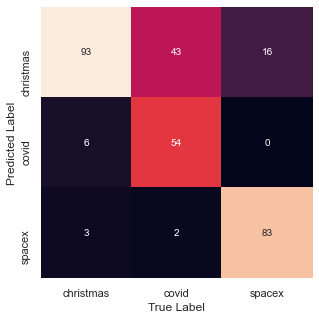

In [75]:
distinct_label = lab # since confusion matrix label is automatically sorted, sort the distinct label in train_labels to prepare x, y label for heatmap
mat = confusion_matrix(test["Classification"], pred_label)
plt.figure(figsize = (5, 5))
ax = sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = sorted(set(test["Classification"])), yticklabels = distinct_label)
ax.set_ylim(len(distinct_label), 0) # since heatmap cut off numbers, we need to set up y limit 

plt.xlabel("True Label")
plt.ylabel("Predicted Label");

print("Test F1 scores:")
print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(test_labels, pred_label, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(test_labels, pred_label, average = "macro"), 6))

# Training set score
print("Train F1 scores:")
print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(train_labels, pred_label_train, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(train_labels, pred_label_train, average = "macro"), 6))

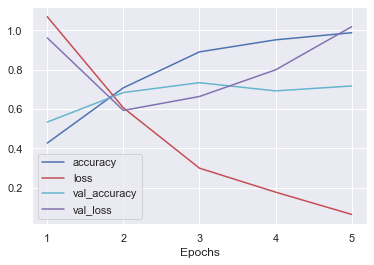

In [76]:
plt.plot(history.history["accuracy"], '-b')
plt.plot(history.history["loss"], '-r')
plt.plot(history.history["val_accuracy"], '-c')
plt.plot(history.history["val_loss"], '-m')
plt.xlabel("Epochs")
plt.legend(["accuracy", "loss", "val_accuracy", "val_loss"])
plt.xticks(np.arange(len(history.history["accuracy"])), np.arange(1, len(history.history["accuracy"]) + 1))
plt.show()

## 4-2. Bidirectional LSTM with 3 hidden layer (100,200,50) with 0.5 drop out

In [77]:
model_biLSTM2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Dropout(.5, input_shape = (100, )),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(35, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])
model_biLSTM2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         825100    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 35)                1785      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

Epoch 1/3
34/34 - 6s - loss: 1.0745 - accuracy: 0.4148 - val_loss: 1.0445 - val_accuracy: 0.5083
Epoch 2/3
34/34 - 5s - loss: 0.8543 - accuracy: 0.6796 - val_loss: 0.6851 - val_accuracy: 0.6750
Epoch 3/3
34/34 - 5s - loss: 0.3624 - accuracy: 0.8704 - val_loss: 0.7804 - val_accuracy: 0.6667
Test F1 scores:
Micro-average F1 scores: 0.766667
Macro-average F1 scores: 0.77195
Train F1 scores:
Micro-average F1 scores: 0.915
Macro-average F1 scores: 0.914493


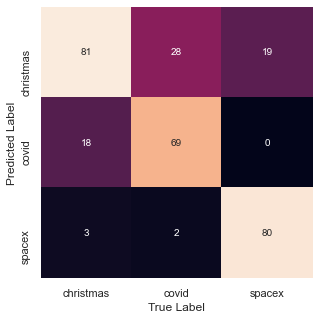

In [78]:
model_biLSTM2.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
num_epochs = 3
history = model_biLSTM2.fit(train_padded, train_label_seq, batch_size = 32,
                            validation_split = 0.1, epochs = num_epochs, verbose = 2)

pred = model_biLSTM2.predict(test_padded)
pred_tain = model_biLSTM2.predict(train_padded)

pred_label = []
for i in pred :
    pred_label.append(lab[np.argmax(i)])
    
pred_label_train = []
for i in pred_tain :
    pred_label_train.append(lab[np.argmax(i)])

distinct_label = lab # since confusion matrix label is automatically sorted, sort the distinct label in train_labels to prepare x, y label for heatmap
mat = confusion_matrix(test["Classification"], pred_label)
plt.figure(figsize = (5, 5))
ax = sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = sorted(set(test["Classification"])), yticklabels = distinct_label)
ax.set_ylim(len(distinct_label), 0) # since heatmap cut off numbers, we need to set up y limit 

plt.xlabel("True Label")
plt.ylabel("Predicted Label");

print("Test F1 scores:")
print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(test_labels, pred_label, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(test_labels, pred_label, average = "macro"), 6))

# Training set score
print("Train F1 scores:")
print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(train_labels, pred_label_train, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(train_labels, pred_label_train, average = "macro"), 6))

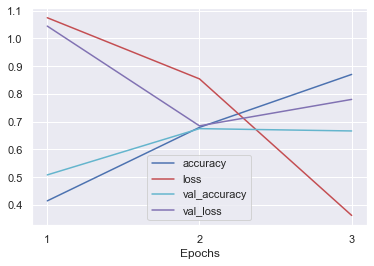

In [79]:
plt.plot(history.history["accuracy"], '-b')
plt.plot(history.history["loss"], '-r')
plt.plot(history.history["val_accuracy"], '-c')
plt.plot(history.history["val_loss"], '-m')
plt.xlabel("Epochs")
plt.legend(["accuracy", "loss","val_accuracy", "val_loss"])
plt.xticks(np.arange(len(history.history["accuracy"])), np.arange(1, len(history.history["accuracy"]) + 1))
plt.show()

# 3 layers

In [80]:
model_biLSTM3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Dropout(.5, input_shape = (100, )),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(35, activation = 'relu'),
    tf.keras.layers.Dense(70, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])
model_biLSTM3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 100)         825100    
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_11 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_12 (Dense)             (None, 35)                1785      
_________________________________________________________________
dense_13 (Dense)             (None, 70)               

Epoch 1/3
34/34 - 5s - loss: 1.0864 - accuracy: 0.3778 - val_loss: 1.0304 - val_accuracy: 0.4750
Epoch 2/3
34/34 - 5s - loss: 0.7766 - accuracy: 0.6565 - val_loss: 0.7913 - val_accuracy: 0.6333
Epoch 3/3
34/34 - 5s - loss: 0.2947 - accuracy: 0.8833 - val_loss: 0.8113 - val_accuracy: 0.6667
Test F1 scores:
Micro-average F1 scores: 0.746667
Macro-average F1 scores: 0.754276
Train F1 scores:
Micro-average F1 scores: 0.909167
Macro-average F1 scores: 0.910349


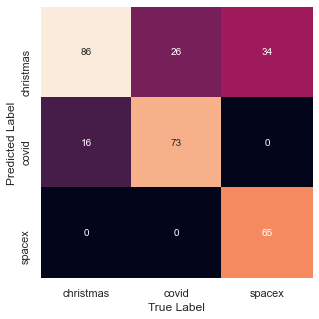

In [81]:
model_biLSTM3.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
num_epochs = 3
history = model_biLSTM3.fit(train_padded, train_label_seq, batch_size = 32,
                            validation_split = 0.1, epochs = num_epochs, verbose = 2)

pred = model_biLSTM3.predict(test_padded)
pred_tain = model_biLSTM3.predict(train_padded)

pred_label = []
for i in pred :
    pred_label.append(lab[np.argmax(i)])
    
pred_label_train = []
for i in pred_tain :
    pred_label_train.append(lab[np.argmax(i)])

distinct_label = lab # since confusion matrix label is automatically sorted, sort the distinct label in train_labels to prepare x, y label for heatmap
mat = confusion_matrix(test["Classification"], pred_label)
plt.figure(figsize = (5, 5))
ax = sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = sorted(set(test["Classification"])), yticklabels = distinct_label)
ax.set_ylim(len(distinct_label), 0) # since heatmap cut off numbers, we need to set up y limit 

plt.xlabel("True Label")
plt.ylabel("Predicted Label");

print("Test F1 scores:")
print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(test_labels, pred_label, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(test_labels, pred_label, average = "macro"), 6))

# Training set score
print("Train F1 scores:")
print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(train_labels, pred_label_train, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(train_labels, pred_label_train, average = "macro"), 6))

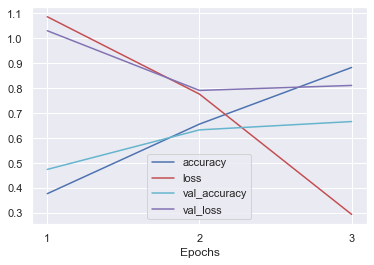

In [82]:
plt.plot(history.history["accuracy"], '-b')
plt.plot(history.history["loss"], '-r')
plt.plot(history.history["val_accuracy"], '-c')
plt.plot(history.history["val_loss"], '-m')
plt.xlabel("Epochs")
plt.legend(["accuracy", "loss","val_accuracy", "val_loss"])
plt.xticks(np.arange(len(history.history["accuracy"])), np.arange(1, len(history.history["accuracy"]) + 1))
plt.show()

## 5. Compute similarities between tweets using Fast Text word embedding

In [83]:
#pip install gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models import FastText

In [84]:
model_ft = FastText(window = 3, min_count = 1, sentences = data['Text']) #100d word embedding
wv = model_ft.wv

In [85]:
from nltk.corpus import stopwords
import string
import numpy as np

def calc_doc_embedding(doc, embeddings, embed_size) :
    stopset = stopwords.words('english') + list(string.punctuation)
    words = [w for w in doc.lower().split() if w not in stopset] # exclude word in stopset
    word_cent = np.zeros(embed_size)
    
    count = 0
    for word in words :
        word_cent = word_cent + embeddings[word] 
        count = count + 1 # only count the word that is not stop words and not OOV

    if count == 0 :
        return None
    
    doc_embed = word_cent / count
    return doc_embed # return value is np array 

In [86]:
# function for calculating the cosine similarity
def cal_similarity(a, b) :
    return np.round(np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)), 6)

# function for removing emoji
def remove_emoji(string) :
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', string)

# function for cleaning text
def clean(Text) :
    Text = remove_emoji(Text) # remove emoji
    Text = re.sub("[-/]", " ", Text) # substitute dash and slash with space       
    text_split = Text.lower().split() # split string into list
    remove_list = []
    for t in text_split :
        if ("covid" or "christmas" or "spacex") in t : # remove all words containing our three hashtags
            remove_list.append(t)
        if 'http' in t : # remove link
            remove_list.append(t)
        if '@' in t : # remove ...@...
            remove_list.append(t)
        if t == '\n' : # remove new line character
            remove_list.append(t)
    text_split = [t for t in text_split if t not in remove_list]     
    
    for i in range(len(text_split)) :
        t = text_split[i]
        if t.startswith("'") or t.startswith('"') : # remove quotation mark
            text_split[i] = t[1:] 
        if t.endswith("'") or t.endswith('"') : 
            text_split[i] = t[:len(t) - 1]         
        text_split[i] = re.sub("[^a-z']", "", t)

    stopset = stopwords.words('english') + list(string.punctuation)
    text_split = [t for t in text_split if t not in stopset]  
            
    Text = ' '.join(text_split) # join the list back to string

    return Text

In [87]:
# function to find hashtag suggestion using the best model and similarity 
def hashtag_suggestion() :
    hashtag1 = ""
    hashtag2 = []
    similarlity_dict = dict()
    doc1 = clean(input("Please enter tweet: "))
    if len(doc1) == 0 :
        return "Error! Impossible to suggest hashtags. Please enter tweet again."
    else :
        hashtag1 = model3_2.predict(vectorizer.transform([doc1]))[0] # get predicted hashtag by the best model
        data2 = data[data['Classification'] == hashtag1].reset_index() # get data from the same hashtag and then calculate similarity between these data and the text
        
        for i in range(len(data2)) :   
            doc2 = data2['Text'][i]         
            similarlity_dict[i] = cal_similarity(calc_doc_embedding(doc1, embeddings, embed_size), calc_doc_embedding(doc2, embeddings, embed_size))

        # find top 5 similarities
        n = 0
        for i in sorted(similarlity_dict.items(), reverse = True, key = lambda t: t[1]) :     
            for h in data2['Hashtag'][i[0]] :
                if h not in hashtag2 : 
                    hashtag2.append(h)
            n = n + 1
            if n == 5 :
                break 
    
        # print all suggested hashtags
        print("1. ", end = "")
        print(hashtag1)
        c = 2
        for i in hashtag2 :
            print(c, end = "")
            print(". ", end = "")
            print(i)
            c = c + 1
                              
        return 

In [88]:
embeddings, embed_size = wv, 100

In [208]:
filename = 'model_ft.sav'
pickle.dump(model_ft, open(filename, 'wb'))

In [89]:
hashtag_suggestion()

Please enter tweet: Holidays are coming soon!!! 🥰🥰🥰
1. christmas
2. homealone
3. diehard
4. happynewyear
5. art
6. original
7. cute
8. beautiful
9. anime
10. manga
11. pencil
12. kawaii
13. drawing
14. santa
15. holidays
16. fanart
17. christmastree


In [90]:
hashtag_suggestion()

Please enter tweet: Hope the weather is good. So excited to see the launch!!!
1. spacex
2. dragon
3. spacelaunchlive
4. launchamerica
5. theastronauts
6. spacecases
7. spacecampalumni


In [91]:
hashtag_suggestion()

Please enter tweet: we have already lived with pandemic for 1 years!!
1. covid
2. covid19
3. investing
4. investments
5. investors
6. travel
7. traveling
